## DATA UNDERSTANDING

In [1]:
pip install albumentations opencv-python-headless # Albumentations untuk data augmentation pada gambar.

In [2]:
import zipfile  # Mengimpor library zipfile untuk bekerja dengan file ZIP
import os  # Mengimpor library os untuk berinteraksi dengan sistem file

# Path ke file ZIP menggunakan path absolut
zip_file_path = os.path.abspath("dataset dami 12.zip")

# Path untuk ekstraksi file ZIP
extract_to_path = "extracted_data_folder"  # Menentukan folder tujuan tempat data diekstrak
os.makedirs(extract_to_path, exist_ok=True)  # Membuat folder tujuan jika folder tersebut belum ada (exist_ok=True memastikan tidak ada error jika folder sudah ada)

# Ekstraksi file ZIP
try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:  # Membuka file ZIP dalam mode baca ('r')
        zip_ref.extractall(extract_to_path)  # Mengekstrak semua isi file ZIP ke folder tujuan yang telah ditentukan
    print(f"Dataset berhasil diekstrak ke: {extract_to_path}")  # Menampilkan pesan bahwa ekstraksi berhasil
except zipfile.BadZipFile:  # Menangkap error jika file yang diberikan bukan file ZIP yang valid
    print(f"Error: File '{zip_file_path}' is not a valid ZIP file. Please check the file and try again.")  # Menampilkan pesan error jika file ZIP rusak atau tidak valid


Dataset berhasil diekstrak ke: extracted_data_folder


In [3]:
dataset_path = "extracted_data_folder/dataset"

In [4]:
import os  # Mengimpor library os untuk berinteraksi dengan sistem file

# Path ke dataset yang telah diekstrak
dataset_path = "extracted_data_folder/dataset"  # Menentukan path ke folder yang berisi dataset yang telah diekstrak

# Periksa kategori dalam dataset
categories = os.listdir(dataset_path)  # Mengambil daftar semua item di dalam folder dataset (kategori atau file)
print(f"Kategori yang ditemukan: {categories}")  # Menampilkan kategori yang ditemukan dalam dataset

# Hitung jumlah file di setiap kategori
for category in categories:  # Melakukan iterasi untuk setiap kategori
    category_path = os.path.join(dataset_path, category)  # Menyusun path lengkap untuk kategori ini
    if os.path.isdir(category_path):  # Memeriksa apakah kategori tersebut adalah folder (bukan file)
        num_files = len(os.listdir(category_path))  # Menghitung jumlah file dalam folder kategori
        print(f"Kategori '{category}' memiliki {num_files} file.")  # Menampilkan jumlah file yang ada di kategori ini


Kategori yang ditemukan: ['test_color', 'train_color', 'test_black', 'train_black']
Kategori 'test_color' memiliki 7 file.
Kategori 'train_color' memiliki 57 file.
Kategori 'test_black' memiliki 7 file.
Kategori 'train_black' memiliki 57 file.


In [5]:
from PIL import Image  # Mengimpor library PIL untuk membuka dan memanipulasi gambar

# Inisialisasi list untuk menyimpan informasi gambar
dimensions = []  # List untuk menyimpan dimensi (lebar, tinggi) gambar
formats = []  # List untuk menyimpan format gambar (misalnya, 'JPEG', 'PNG')
file_sizes = []  # List untuk menyimpan ukuran file gambar dalam bytes

# Looping melalui setiap kategori dalam dataset
for category in categories:
    category_path = os.path.join(dataset_path, category)  # Menentukan path lengkap untuk folder kategori ini
    for img_name in os.listdir(category_path):  # Melakukan iterasi untuk setiap file gambar di kategori ini
        img_path = os.path.join(category_path, img_name)  # Menyusun path lengkap untuk gambar ini
        try:
            # Membuka gambar menggunakan PIL
            with Image.open(img_path) as img:
                dimensions.append(img.size)  # Menyimpan dimensi gambar (width, height)
                formats.append(img.format)  # Menyimpan format gambar (misalnya, 'JPEG', 'PNG')
                file_sizes.append(os.path.getsize(img_path))  # Menyimpan ukuran file gambar dalam bytes
        except Exception as e:
            # Jika terjadi kesalahan saat membuka gambar (misalnya file rusak atau tidak bisa dibaca)
            print(f"Error membaca file: {img_path}, {e}")

# Statistik dimensi gambar (mengambil dimensi unik)
unique_dimensions = set(dimensions)  # Menggunakan set untuk mendapatkan dimensi unik
print(f"Dimensi gambar unik: {unique_dimensions}")  # Menampilkan dimensi gambar unik

# Statistik format gambar (mengambil format unik)
unique_formats = set(formats)  # Menggunakan set untuk mendapatkan format unik
print(f"Format gambar unik: {unique_formats}")  # Menampilkan format gambar unik

# Statistik ukuran file gambar (menghitung rata-rata ukuran file)
avg_file_size = sum(file_sizes) / len(file_sizes) if file_sizes else 0  # Menghitung rata-rata ukuran file
print(f"Rata-rata ukuran file: {avg_file_size / 1024:.2f} KB")  # Menampilkan rata-rata ukuran file dalam KB


Dimensi gambar unik: {(1440, 3600)}
Format gambar unik: {'PNG'}
Rata-rata ukuran file: 872.18 KB


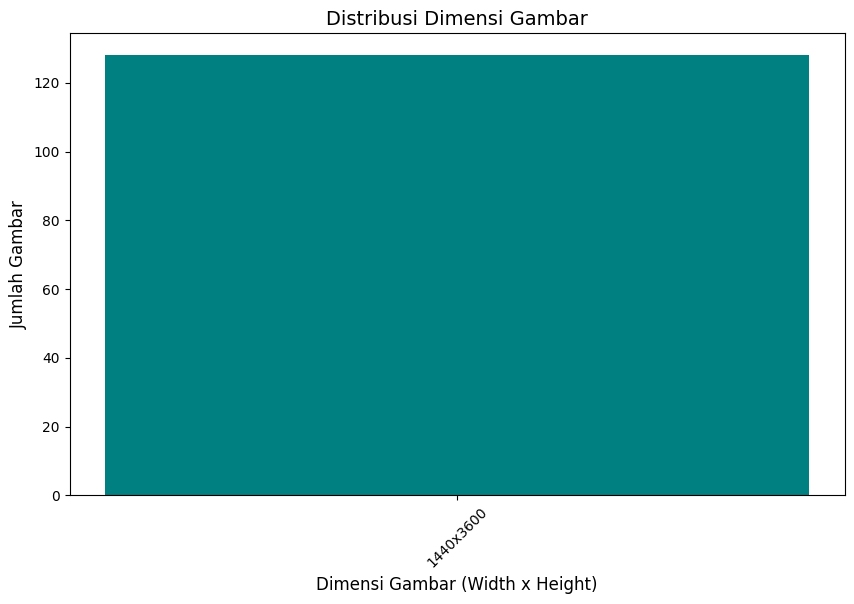

In [6]:
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk membuat grafik
from collections import Counter  # Mengimpor Counter dari collections untuk menghitung frekuensi elemen

# Menghitung distribusi dimensi gambar
dimension_counts = Counter(dimensions)  # Menggunakan Counter untuk menghitung berapa kali masing-masing dimensi gambar muncul

# Membuat plot
plt.figure(figsize=(10, 6))  # Menentukan ukuran grafik (10 inci lebar dan 6 inci tinggi)
# Membuat grafik batang dengan sumbu x berupa dimensi gambar (misalnya '1920x1080') dan sumbu y berupa jumlah gambar dengan dimensi tersebut
plt.bar([f"{dim[0]}x{dim[1]}" for dim in dimension_counts.keys()], dimension_counts.values(), color='teal')
# Memberikan judul pada grafik
plt.title("Distribusi Dimensi Gambar", fontsize=14)
# Memberikan label untuk sumbu x
plt.xlabel("Dimensi Gambar (Width x Height)", fontsize=12)
# Memberikan label untuk sumbu y
plt.ylabel("Jumlah Gambar", fontsize=12)
# Memutar label pada sumbu x agar lebih mudah dibaca (45 derajat)
plt.xticks(rotation=45)
# Menampilkan grafik
plt.show()


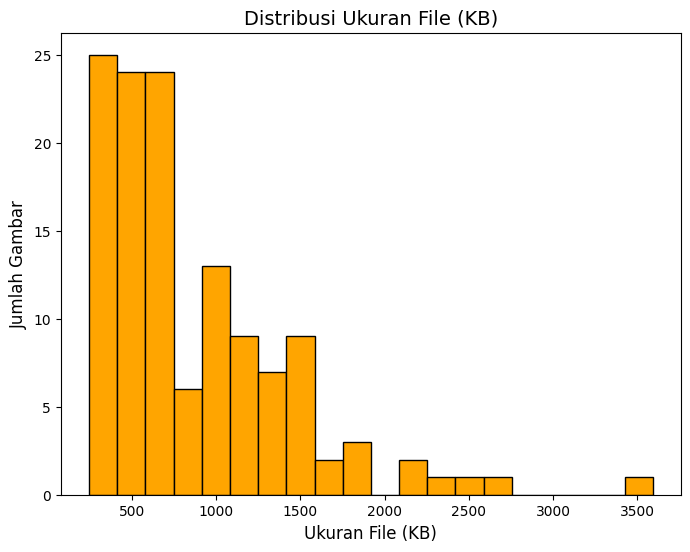

In [7]:
import numpy as np  # Mengimpor pustaka numpy, meskipun tidak digunakan secara eksplisit dalam kode ini

# Membuat histogram untuk distribusi ukuran file
plt.figure(figsize=(8, 6))  # Menentukan ukuran grafik (8 inci lebar dan 6 inci tinggi)

# Membuat histogram ukuran file, ukuran file dibagi 1024 untuk mengonversi dari bytes ke kilobytes
plt.hist([size / 1024 for size in file_sizes], bins=20, color='orange', edgecolor='black')
# Menambahkan judul pada grafik
plt.title("Distribusi Ukuran File (KB)", fontsize=14)
# Menambahkan label pada sumbu x (Ukuran file dalam KB)
plt.xlabel("Ukuran File (KB)", fontsize=12)
# Menambahkan label pada sumbu y (Jumlah gambar dalam setiap rentang ukuran file)
plt.ylabel("Jumlah Gambar", fontsize=12)
# Menampilkan grafik
plt.show()


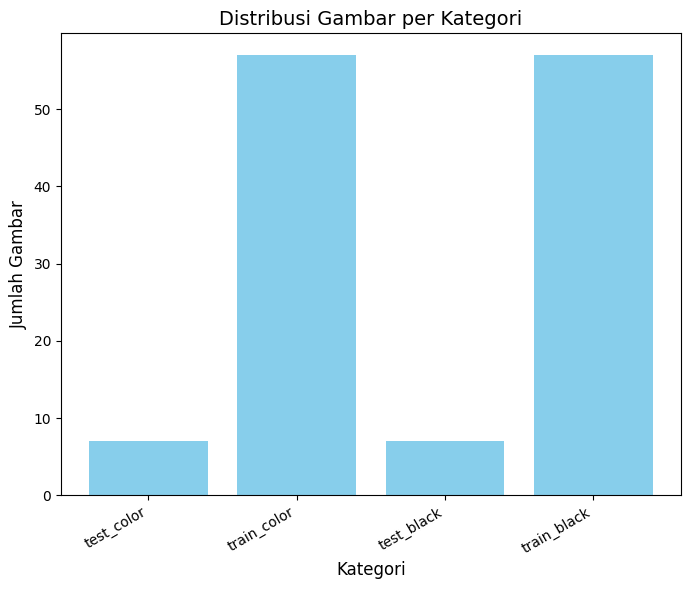

In [8]:
# Data distribusi kategori
class_counts = {cat: len(os.listdir(os.path.join(dataset_path, cat))) for cat in categories}

# Plot distribusi
plt.figure(figsize=(8, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Distribusi Gambar per Kategori", fontsize=14)
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Jumlah Gambar", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.show()


In [9]:
import numpy as np

# Total jumlah gambar
total_images = sum(class_counts.values())  # Hitung total jumlah gambar dari class_counts

# Standar deviasi jumlah gambar
std_dev = np.std(list(class_counts.values()))  # Standar deviasi dari jumlah gambar per kategori
print(f"Total gambar: {total_images}")
print(f"Standar deviasi distribusi: {std_dev:.2f}")

# Analisis keseimbangan
threshold = 0.1 * (total_images / len(class_counts))  # 10% dari rata-rata jumlah gambar per kategori
if std_dev > threshold:
    print("Dataset kemungkinan tidak seimbang.")
else:
    print("Dataset kemungkinan cukup seimbang.")


Total gambar: 128
Standar deviasi distribusi: 25.00
Dataset kemungkinan tidak seimbang.


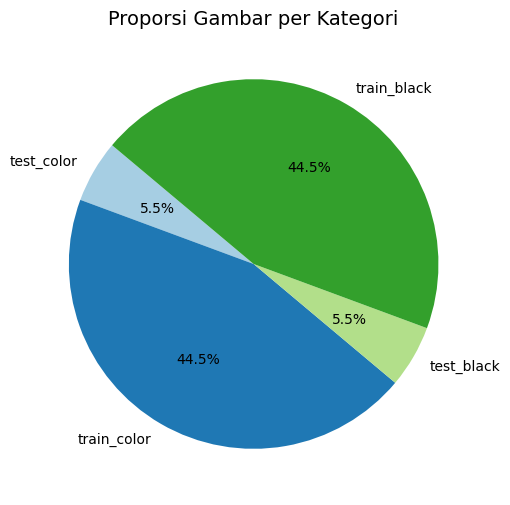

In [10]:
# Diagram lingkaran
plt.figure(figsize=(8, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Proporsi Gambar per Kategori", fontsize=14)
plt.show()


In [11]:
import numpy as np

# Memeriksa tipe data piksel
for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            with Image.open(img_path) as img:
                img_array = np.array(img)  # Konversi ke array numpy
                print(f"File: {img_name}")
                print(f"  - Array shape: {img_array.shape}")  # Dimensi array
                print(f"  - Data type: {img_array.dtype}")  # Tipe data (uint8, float32, dll.)
                break  # Periksa hanya satu file per kategori
        except Exception as e:
            print(f"Error membaca file: {img_path}, {e}")


File: sadum_sri-rahayu_001.png
  - Array shape: (3600, 1440, 3)
  - Data type: uint8
File: Harungguan_Rachel_001.png
  - Array shape: (3600, 1440, 3)
  - Data type: uint8
File: gray_Harungguan_Rachel_006.png
  - Array shape: (3600, 1440)
  - Data type: uint8
File: gray_sadum_sri-rahayu_009.png
  - Array shape: (3600, 1440)
  - Data type: uint8


In [12]:
from PIL import Image

dimensions = []
formats = []


for category in categories:
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            try:
                with Image.open(img_path) as img:
                    dimensions.append(img.size)  # (width, height)
                    formats.append(img.format)
            except Exception as e:
                print(f"Error membaca file: {img_path}, {e}")


print(f"Dimensi gambar unik: {set(dimensions)}")
print(f"Format gambar unik: {set(formats)}")


Dimensi gambar unik: {(1440, 3600)}
Format gambar unik: {'PNG'}


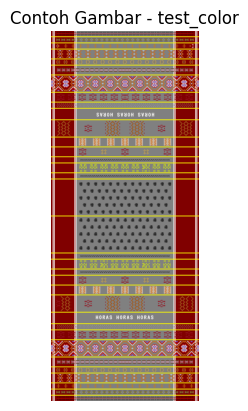

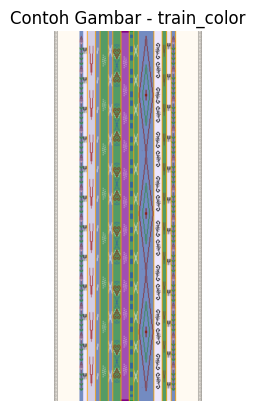

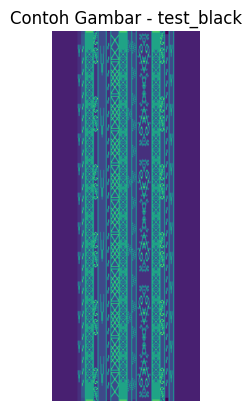

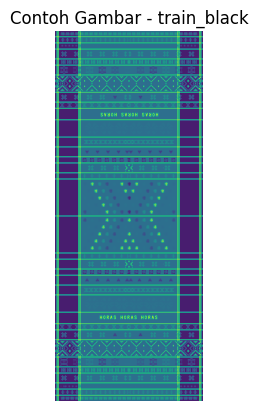

In [13]:
import matplotlib.pyplot as plt
import numpy as np

for category in categories:
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        sample_image_path = os.path.join(category_path, os.listdir(category_path)[0])
        with Image.open(sample_image_path) as img:
            plt.figure()
            plt.imshow(np.array(img))
            plt.title(f"Contoh Gambar - {category}")
            plt.axis('off')
            plt.show()


## DATA PREPARATION

In [14]:
import zipfile
import os
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import albumentations as A
import cv2


# Data Augmentation using Albumentations
def augment_image(image_path, augmentations):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    augmented = augmentations(image=image)
    augmented_image = augmented['image']
    return augmented_image


# Example augmentations
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=20, p=0.3),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=.75)
])

# Apply augmentations and save augmented images (Example: Save to a new folder)
augmented_dataset_path = "augmented_dataset"
os.makedirs(augmented_dataset_path, exist_ok=True)

for category in categories:
    category_path = os.path.join(dataset_path, category)
    augmented_category_path = os.path.join(augmented_dataset_path, category)
    os.makedirs(augmented_category_path, exist_ok=True)

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            augmented_img = augment_image(img_path, augmentations)
            augmented_img_path = os.path.join(augmented_category_path, f"augmented_{img_name}")
            Image.fromarray(augmented_img).save(augmented_img_path)

        except Exception as e:
            print(f"Error augmenting image {img_path}: {e}")

print("Data augmentation complete.")

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Data augmentation complete.


### MODEL KNN

In [15]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the augmented dataset
augmented_dataset_path = "augmented_dataset"
categories = os.listdir(augmented_dataset_path)

# Prepare data and labels
data = []
labels = []
for category in categories:
    category_path = os.path.join(augmented_dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((64, 64))  # Resize for consistency (adjust as needed)
            img_array = np.array(img).flatten()  # Flatten image to a 1D array
            data.append(img_array)
            labels.append(category)
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.23076923076923078
              precision    recall  f1-score   support

  test_black       0.00      0.00      0.00         2
  test_color       0.00      0.00      0.00         1
 train_black       0.23      0.27      0.25        11
 train_color       0.30      0.25      0.27        12

    accuracy                           0.23        26
   macro avg       0.13      0.13      0.13        26
weighted avg       0.24      0.23      0.23        26

